## Dependencies

In [0]:
# !pip install imutils


In [0]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd 
import random
import cv2

In [0]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

np.random.seed(0) 

seed = 580
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# connect to drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Keras Specific Dependencies

In [6]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

# Keras
# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.datasets import mnist

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping


Using TensorFlow backend.


In [0]:
# covid_dataset_path = 'https://data-imaging.s3.amazonaws.com/covid-chest-xray'
covid_dataset_path = '/content/drive/My Drive/covid-chest-xray'

In [0]:
samples = 25

In [9]:
# construct the path to the metadata CSV file and load it
csvPath = "/content/drive/My Drive/covid-chest-xray/metadata.csv"
df = pd.read_csv(csvPath)
df.head(2)

# https://data-imaging.s3.amazonaws.com/covid-chest-xray/metadata.csv
# print(csvPath)

,Patientid,offset,sex,age,finding,survival,view,modality,date,location,filename,doi,url,license,clinical notes,other notes,Unnamed: 16
0,2,0.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,PA,X-ray,2020,NaN,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,NaN,NaN,NaN


In [10]:
print(df.columns)

Index(['Patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'view',
       'modality', 'date', 'location', 'filename', 'doi', ' url', 'license',
       'clinical notes', 'other notes', 'Unnamed: 16'],
      dtype='object')


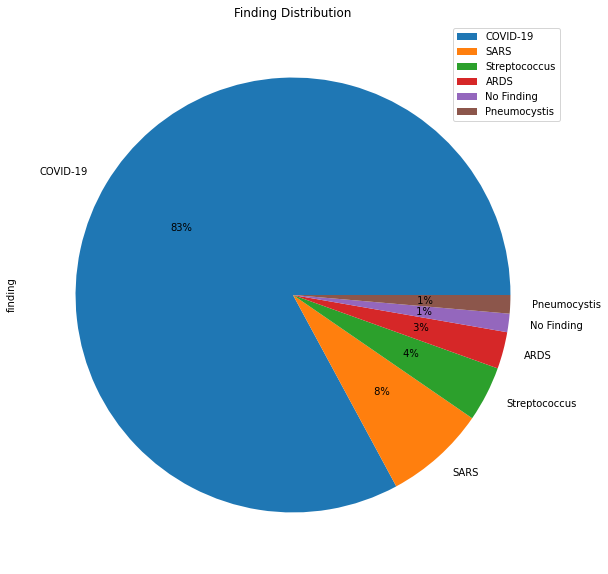

In [23]:
# Finding distribution (nan if unknown)
ax = df['finding'].value_counts(dropna=False).plot.pie(y='Finding',
                                                       legend = True,
                                                       autopct='%2.0f%%',
                                                       figsize = (10,10),
                                                       title = 'Finding Distribution')

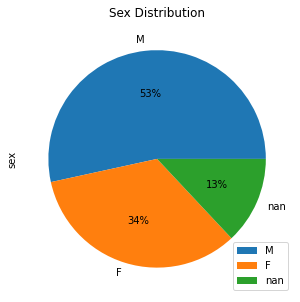

In [24]:

# Sex distribution (nan if unknown)
ax = df['sex'].value_counts(dropna=False).plot.pie(y='sex',
                                                    legend = True,
                                                    autopct='%2.0f%%',
                                                    figsize = (5,5),
                                                    title = 'Sex Distribution')

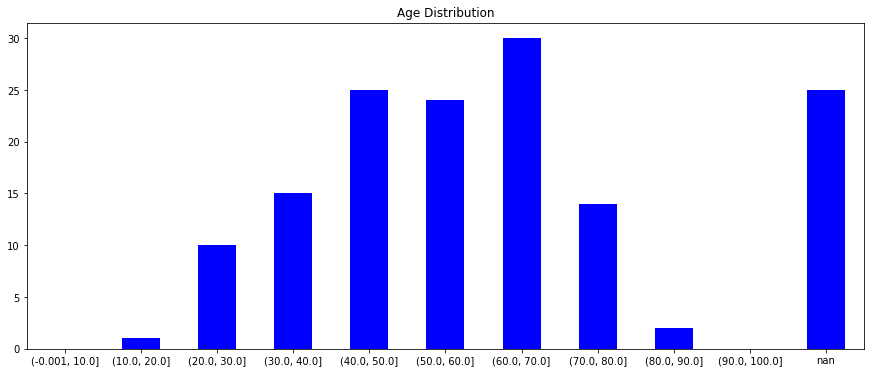

In [25]:
# Now age (nan in unknown)
out = pd.cut(df['age'], bins=np.arange(0,110,10).tolist(), include_lowest=True)
ax = out.value_counts(sort=False, dropna=False).plot.bar(rot=0, color="b", figsize=(15,6), title= "Age Distribution")
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.show()

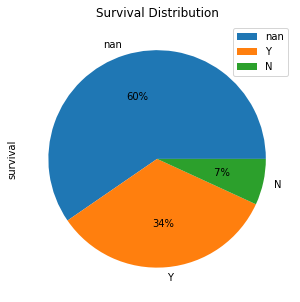

In [26]:
# Survival 
ax = df['survival'].value_counts(dropna=False).plot.pie(y='survival',
                                                        legend = True,
                                                        autopct='%2.0f%%',
                                                        figsize = (5,5),
                                                        title = 'Survival Distribution')

Build the list of paths to the diferent data sets

In [11]:
import shutil
# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])
    # print(imagePath)
    # if the image file listed on the csv file does not exist then ignore entry
    if not os.path.sep.join(imagePath):
      continue
    # extract the filename from the path 
    filename= row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"/content/drive/My Drive/data/covid", filename])
    
    # copy the image
    shutil.copy2(imagePath, outputPath)



auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/data/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/covid-chest-xray/images/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/data/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/covid-chest-xray/images/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/data/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/covid-chest-xray/images/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/My Drive/data/covid/auntmi

In [0]:
# construct the path to the xrays
xraysPath = "/content/drive/My Drive/pneumonia-chest-xrayS/chest_xray"


In [0]:
from imutils import paths
# construct the path to the metadata CSV file and load it
basePath = os.path.sep.join([xraysPath, "train", "NORMAL"])
imagePaths = list(paths.list_images(basePath))


In [15]:
print (imagePath)

/content/drive/My Drive/covid-chest-xray/images/covid-19-pneumonia-19.jpg


In [0]:
# randomly sample the image paths
random.seed(580)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

In [0]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = imagePath.split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"/content/drive/My Drive/data/normal", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

Plot the xrays

In [0]:
# helper function to add the xrays in a grid
def ceildiv(a, b):
    return -(-a // b)

In [0]:
def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [0]:
normal_images = list(paths.list_images(f"/content/drive/My Drive/data/normal"))
covid_images = list(paths.list_images(f"/content/drive/My Drive/data/covid"))

In [24]:
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

<Figure size 720x360 with 0 Axes>

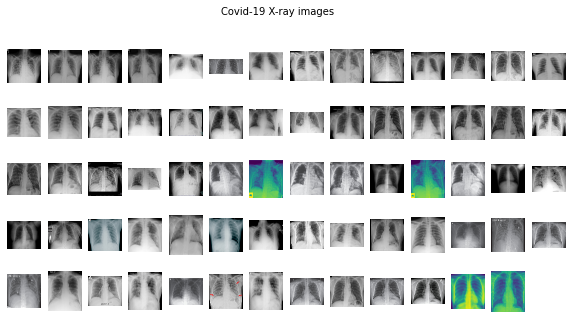

In [25]:
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")

In [0]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 10
BS = 8

In [56]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

[INFO] loading images...


NameError: ignored

### Load the MNIST Handwriting Dataset from Keras

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


### Plot the first digit

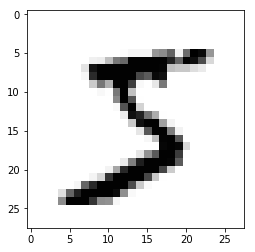

In [0]:
# Plot the first image from the dataset
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

### Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [0]:
# Our image is an array of pixels ranging from 0 to 255
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### For Logistic Regression, we want to flatten our data into rows of 1D image arrays

In [0]:
# We want to flatten our image of 28x28 pixels to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 784)
Testing Shape: (10000, 784)


## Scaling and Normalization

We use Sklearn's MinMaxScaler to normalize our data between 0 and 1

In [0]:
# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Alternative way to normalize this dataset since we know that the max pixel value is 255
# X_train = X_train.astype("float32")
# X_test = X_test.astype("float32")
# X_train /= 255.0
# X_test /= 255.0

## One-Hot Encoding

We need to one-hot encode our integer labels using the `to_categorical` helper function

In [0]:
# Our Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [0]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building our Model

In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

## Our first step is to create an empty sequential model

In [0]:
# Create an empty sequential model
model = Sequential()

## Next, we add our first hidden layer

In the first hidden layer, we must also specify the dimension of our input layer. This will simply be the number of elements (pixels) in each image.

In [0]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

## We then add a second hidden layer with 100 densely connected nodes

A dense layer is when every node from the previous layer is connected to each node in the current layer.

In [0]:
# Add a second hidden layer
model.add(Dense(100, activation='relu'))

## Our final output layer uses a `softmax` activation function for logistic regression.

We also need to specify the number of output classes. In this case, the number of digits that we wish to classify.

In [0]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

## Compiling our Model

In [0]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

## Model Summary

In [0]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


## Compile and Train our Model

Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [0]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Finally, we train our model using our training data

Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [0]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Epoch 1/10
 - 10s - loss: 0.2431 - acc: 0.9287
Epoch 2/10
 - 9s - loss: 0.1052 - acc: 0.9684
Epoch 3/10
 - 10s - loss: 0.0750 - acc: 0.9764
Epoch 4/10
 - 9s - loss: 0.0569 - acc: 0.9827
Epoch 5/10
 - 9s - loss: 0.0466 - acc: 0.9846
Epoch 6/10
 - 9s - loss: 0.0380 - acc: 0.9879
Epoch 7/10
 - 9s - loss: 0.0327 - acc: 0.9890
Epoch 8/10
 - 8s - loss: 0.0274 - acc: 0.9910
Epoch 9/10
 - 8s - loss: 0.0214 - acc: 0.9933
Epoch 10/10
 - 8s - loss: 0.0211 - acc: 0.9930


## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [0]:
# Save the model
model.save("mnist_trained.h5")

In [0]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("mnist_trained.h5")

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [0]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.0957128526122302, Accuracy: 0.9777


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [0]:
# Grab just one data point to test with
test = np.expand_dims(X_train[0], axis=0)
test.shape

(1, 784)

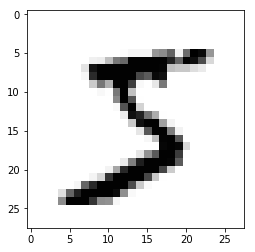

In [0]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [0]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(test).round()

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Grab just one data point to test with
test = np.expand_dims(X_train[2], axis=0)
test.shape

(1, 784)

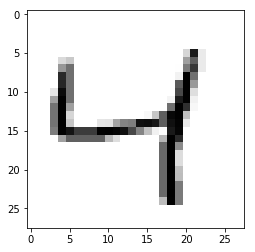

In [0]:
plt.imshow(scaler.inverse_transform(test).reshape(28, 28), cmap=plt.cm.Greys)

In [0]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Predicted class: [4]


# Import a Custom Image

In [0]:
filepath = "../Images/test8.png"

In [0]:
from tensorflow.keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, color_mode="grayscale")
im

In [0]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(28, 28, 1)

In [0]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

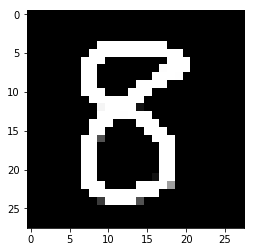

In [0]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

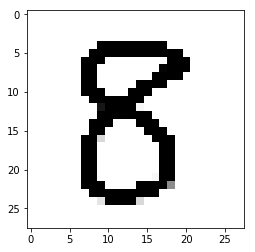

In [0]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [0]:
# Make predictions
model.predict_classes(img)

array([8])